# Model Selection and Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

## Baseline model

In [2]:
df_mf_base = pd.read_csv('../Data/df_mf_base.csv')

In [3]:
df_mf_base.head()

,Ticker,Morningstar Sustainability Rating,3-year Mean Dividend Yield (%),% of Holdings in Cash,Price/Earnings,Price/Cash Flow,Average Market Cap ($ mil),ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,...,Expense Ratio (%),Minimum Initial Purchase ($),Total Assets ($ mil),Outperform / Underperform,Yes,Yes.1,Average,Below Average,High,Low
0,AAAGX,3,1.97,1.69,32.14,24.23,294701,31.56,44.55,45,...,1.14,2000,1768,Outperform,0,0,0,0,0,0
1,AACIX,2,0.48,3.79,12.96,6.84,8740,2.21,48.49,124,...,0.95,250000,195,Underperform,1,0,0,0,1,0
2,AADEX,2,0.67,1.72,15.04,10.34,57742,12.54,48.12,168,...,0.63,250000,4242,Underperform,1,0,0,0,0,0
3,AADGX,3,0.66,2.62,21.85,16.11,14323,26.21,40.21,51,...,1.08,2500,70,Underperform,1,0,0,1,0,0
4,AAGOX,2,2.38,0.22,42.08,26.35,152652,21.25,36.98,59,...,0.89,0,446,Outperform,1,0,0,0,0,0


In [4]:
X = df_mf_base.drop(['Ticker','Outperform / Underperform'], axis=1)
y = df_mf_base['Outperform / Underperform']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=10)

### Logistic regression

In [5]:
scaler = StandardScaler()

In [6]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled,y_train)

LogisticRegression()

In [8]:
pred_log = logmodel.predict(X_test_scaled)

In [9]:
logmodel.score(X_test_scaled, y_test)

0.9825581395348837

In [10]:
print(confusion_matrix(y_test,pred_log))

[[512  12]
 [  9 671]]


In [11]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

  Outperform       0.98      0.98      0.98       524
Underperform       0.98      0.99      0.98       680

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204



#### Cross validation using cross_val_score

In [12]:
scores_log = cross_val_score(logmodel, X_train_scaled, y_train, scoring='accuracy', cv=10)

In [13]:
scores_log

array([0.97925311, 0.97717842, 0.97297297, 0.98960499, 0.97089397,
       0.98544699, 0.97089397, 0.97713098, 0.97713098, 0.98544699])

In [14]:
scores_log.mean()

0.978595336479154

In [15]:
scores_log.std()

0.006099710588829307

#### Gridsearch

In [16]:
param_grid = {'penalty': ['l1','l2'], 'C': [0.1,1, 10, 100, 1000]} 

In [17]:
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)

In [18]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this 

[CV] ................................. C=10, penalty=l2, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ................................. C=10, penalty=l2, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ................................. C=10, penalty=l2, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ................................. C=10, penalty=l2, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ................................. C=10, penalty=l2, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ................................ C=100, penalty=l1, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] ................................ C=100, penalty=l1, total=   0.0s
[CV] C=100, penalty=l1 ...............................................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

[CV] ................................ C=100, penalty=l2, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] ............................... C=1000, penalty=l1, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] ............................... C=1000, penalty=l1, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] ............................... C=1000, penalty=l1, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] ............................... C=1000, penalty=l1, total=   0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] ............................... C=1000, penalty=l1, total=   0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ............................... C=1000, penalty=l2, total=   0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             verbose=2)

In [19]:
grid.best_params_

{'C': 100, 'penalty': 'l2'}

In [20]:
grid_pred = grid.predict(X_test_scaled)

In [21]:
grid.score(X_test_scaled, y_test)

0.9842192691029901

In [22]:
print(confusion_matrix(y_test,grid_pred))

[[512  12]
 [  7 673]]


In [23]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

  Outperform       0.99      0.98      0.98       524
Underperform       0.98      0.99      0.99       680

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204



In [25]:
#ROC curve

### K nearest neighbors

In [107]:
knn = KNeighborsClassifier(n_neighbors=1)

In [108]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [109]:
pred_knn = knn.predict(X_test_scaled)

In [110]:
knn.score(X_test_scaled, y_test)

0.9609634551495017

In [111]:
print(confusion_matrix(y_test,pred_knn))

[[496  28]
 [ 19 661]]


In [112]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

  Outperform       0.96      0.95      0.95       524
Underperform       0.96      0.97      0.97       680

    accuracy                           0.96      1204
   macro avg       0.96      0.96      0.96      1204
weighted avg       0.96      0.96      0.96      1204



#### Choosing a K value

In [117]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

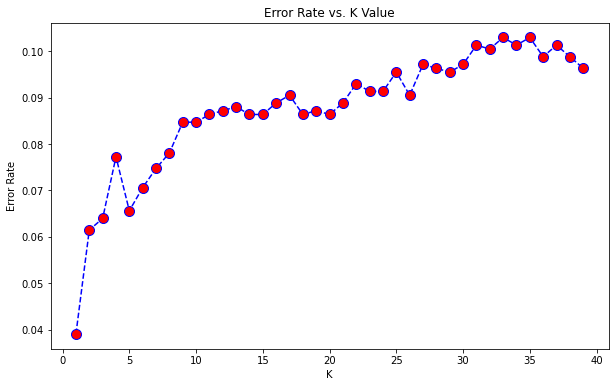

In [118]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Gridsearch

In [119]:
param_grid = {'n_neighbors': list(range(1,31)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean','manhattan']} 

In [120]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=2)

In [121]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  

[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=7, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=7, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=7, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=7, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=7, weights=distance ...............
[CV]  

[CV]  metric=euclidean, n_neighbors=12, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=13, weights=distance ..............
[CV]

[CV]  metric=euclidean, n_neighbors=18, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=18, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=18, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=18, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=18, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=18, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=18, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=19, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=19, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=19, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=19, weights=uniform ...............
[C

[CV]  metric=euclidean, n_neighbors=24, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=24, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=24, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=24, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=24, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=24, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=24, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=24, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=24, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=24, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=24, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=25, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=25, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=25, weights=uniform ...............
[

[CV]  metric=euclidean, n_neighbors=30, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=30, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=30, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=30, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=30, weights=uniform, total=   0.1s
[CV] metric=euclidean, n_neighbors=30, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=30, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=30, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=30, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=30, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=30, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=30, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=30, weights=distance, total=   0.1s
[CV] metric=euclidean, n_neighbors=30, weights=distance ..............
[C

[CV] . metric=manhattan, n_neighbors=6, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=6, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=6, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=6, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=6, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=6, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=6, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=6, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=6, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=6, weights=distance ...............
[CV]  

[CV]  metric=manhattan, n_neighbors=11, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=11, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=11, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=12, weights=distance ..............
[CV]

[CV]  metric=manhattan, n_neighbors=17, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=17, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=17, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=17, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=17, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=17, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=17, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=18, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=18, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=18, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=18, weights=uniform, total=   0.1s
[CV] metric=manhattan, n_neighbors=18, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=18, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=18, weights=uniform ...............
[C

[CV]  metric=manhattan, n_neighbors=23, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=23, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=23, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=23, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=23, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=23, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=23, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=23, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=23, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=23, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=23, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=24, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=24, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=24, weights=uniform ...............
[

[CV]  metric=manhattan, n_neighbors=29, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=29, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=29, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=29, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=29, weights=uniform, total=   0.2s
[CV] metric=manhattan, n_neighbors=29, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=29, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=29, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=29, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=29, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=29, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=29, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=29, weights=distance, total=   0.1s
[CV] metric=manhattan, n_neighbors=29, weights=distance ..............
[C

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.2min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [122]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

In [123]:
grid_pred = grid.predict(X_test_scaled)

In [124]:
grid.score(X_test_scaled, y_test)

0.9667774086378738

In [125]:
print(confusion_matrix(y_test,grid_pred))

[[504  20]
 [ 20 660]]


In [126]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

  Outperform       0.96      0.96      0.96       524
Underperform       0.97      0.97      0.97       680

    accuracy                           0.97      1204
   macro avg       0.97      0.97      0.97      1204
weighted avg       0.97      0.97      0.97      1204



### Decision Tree 

In [39]:
dtree = DecisionTreeClassifier()

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
pred_dtree = dtree.predict(X_test)

In [42]:
dtree.score(X_test, y_test)

0.9825581395348837

In [43]:
print(confusion_matrix(y_test,pred_dtree))

[[509  15]
 [  6 674]]


In [44]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

  Outperform       0.99      0.97      0.98       524
Underperform       0.98      0.99      0.98       680

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204



#### Gridsearch

In [127]:
param_grid = {'criterion': ['gini','entropy'], 'max_depth': range(1,10), 'min_samples_split': range(1,5), 'min_samples_leaf': range(1,5)} 

In [128]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=2)

In [129]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed

[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=5 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=5 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=5 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The s

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed:  1.0min finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=2)

In [130]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [131]:
grid_pred = grid.predict(X_test)

In [132]:
grid.score(X_test, y_test)

0.9817275747508306

In [133]:
print(confusion_matrix(y_test,grid_pred))

[[508  16]
 [  6 674]]


In [134]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

  Outperform       0.99      0.97      0.98       524
Underperform       0.98      0.99      0.98       680

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204



### Random forest

In [135]:
rfc = RandomForestClassifier()

In [136]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [137]:
pred_rfc = rfc.predict(X_test)

In [138]:
rfc.score(X_test, y_test)

0.9817275747508306

In [139]:
print(confusion_matrix(y_test,pred_rfc))

[[513  11]
 [ 11 669]]


In [140]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

  Outperform       0.98      0.98      0.98       524
Underperform       0.98      0.98      0.98       680

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204



#### Gridsearch

In [1]:
param_grid = {'criterion' : ['gini', 'entropy'],
              'bootstrap': [True, False],
              'max_depth': [1,3,5,7,9, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800]
             }

In [3]:
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   0.9s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   0.9s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   0.9s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.2s
[CV] bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, total=   0.9s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.2s
[CV] bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   1.2s
[CV] bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   0.9s
[CV] bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   1.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, criterion=gini, max

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.0s
[CV] bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, criterion=gini, 

In [122]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

In [123]:
grid_pred = grid.predict(X_test)

In [124]:
grid.score(X_test, y_test)

0.9667774086378738

In [125]:
print(confusion_matrix(y_test,grid_pred))

[[504  20]
 [ 20 660]]


In [126]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

  Outperform       0.96      0.96      0.96       524
Underperform       0.97      0.97      0.97       680

    accuracy                           0.97      1204
   macro avg       0.97      0.97      0.97      1204
weighted avg       0.97      0.97      0.97      1204



### Support Vector Machine

In [51]:
svc = SVC()

In [52]:
svc.fit(X_train_scaled,y_train)

SVC()

In [53]:
pred_svc = svc.predict(X_test_scaled)

In [54]:
svc.score(X_test_scaled, y_test)

0.9692691029900332

In [55]:
print(confusion_matrix(y_test,pred_svc))

[[502  22]
 [ 15 665]]


In [56]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

  Outperform       0.97      0.96      0.96       524
Underperform       0.97      0.98      0.97       680

    accuracy                           0.97      1204
   macro avg       0.97      0.97      0.97      1204
weighted avg       0.97      0.97      0.97      1204



#### Gridsearch

In [57]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [58]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [59]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   32.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [60]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [61]:
grid_pred = grid.predict(X_test_scaled)

In [62]:
grid.score(X_test_scaled, y_test)

0.9825581395348837

In [63]:
print(confusion_matrix(y_test,grid_pred))

[[512  12]
 [  9 671]]


In [64]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

  Outperform       0.98      0.98      0.98       524
Underperform       0.98      0.99      0.98       680

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204



### Naive Bayes

In [65]:
nb = GaussianNB()

In [66]:
nb.fit(X_train, y_train)

GaussianNB()

In [67]:
pred_nb = nb.predict(X_test)

In [68]:
nb.score(X_test, y_test)

0.6229235880398671

In [69]:
print(confusion_matrix(y_test,pred_nb))

[[111 413]
 [ 41 639]]


In [70]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

  Outperform       0.73      0.21      0.33       524
Underperform       0.61      0.94      0.74       680

    accuracy                           0.62      1204
   macro avg       0.67      0.58      0.53      1204
weighted avg       0.66      0.62      0.56      1204



#### Gridsearch

In [71]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

In [72]:
grid = GridSearchCV(GaussianNB(),param_grid,refit=True,verbose=2)

In [73]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................
[CV] ................................ var_smoothing=1.0, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................................ var_smoothing=1.0, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................................ var_smoothing=1.0, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................................ var_smoothing=1.0, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................................ var_smoothing=1.0, total=   0.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] ................. var_smoothing=0.8111308307896871, total=   0.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. var_smoothing=0.533669923120631, total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV] ................ var_smoothing=0.43287612810830584, total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV] ................ var_smoothing=0.43287612810830584, total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV] ................ var_smoothing=0.43287612810830584, total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV] ................ var_smoothing=0.43287612810830584, total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV] ................ var_smoothing=0.43287612810830584, total=   0.0s
[CV] var_smoothing=0.3511191734215131 ................................
[CV] ................. var_smoothing=0.3511191734215131, total=   0.0s
[CV] var_smoothing=0.3511191734215131 ................................
[CV] .

[CV] ................ var_smoothing=0.04328761281083057, total=   0.0s
[CV] var_smoothing=0.03511191734215131 ...............................
[CV] ................ var_smoothing=0.03511191734215131, total=   0.0s
[CV] var_smoothing=0.03511191734215131 ...............................
[CV] ................ var_smoothing=0.03511191734215131, total=   0.0s
[CV] var_smoothing=0.03511191734215131 ...............................
[CV] ................ var_smoothing=0.03511191734215131, total=   0.0s
[CV] var_smoothing=0.03511191734215131 ...............................
[CV] ................ var_smoothing=0.03511191734215131, total=   0.0s
[CV] var_smoothing=0.03511191734215131 ...............................
[CV] ................ var_smoothing=0.03511191734215131, total=   0.0s
[CV] var_smoothing=0.02848035868435802 ...............................
[CV] ................ var_smoothing=0.02848035868435802, total=   0.0s
[CV] var_smoothing=0.02848035868435802 ...............................
[CV] .

[CV] ............... var_smoothing=0.002848035868435802, total=   0.0s
[CV] var_smoothing=0.002848035868435802 ..............................
[CV] ............... var_smoothing=0.002848035868435802, total=   0.0s
[CV] var_smoothing=0.002848035868435802 ..............................
[CV] ............... var_smoothing=0.002848035868435802, total=   0.0s
[CV] var_smoothing=0.0023101297000831605 .............................
[CV] .............. var_smoothing=0.0023101297000831605, total=   0.0s
[CV] var_smoothing=0.0023101297000831605 .............................
[CV] .............. var_smoothing=0.0023101297000831605, total=   0.0s
[CV] var_smoothing=0.0023101297000831605 .............................
[CV] .............. var_smoothing=0.0023101297000831605, total=   0.0s
[CV] var_smoothing=0.0023101297000831605 .............................
[CV] .............. var_smoothing=0.0023101297000831605, total=   0.0s
[CV] var_smoothing=0.0023101297000831605 .............................
[CV] .

[CV] .............. var_smoothing=0.0001873817422860383, total=   0.0s
[CV] var_smoothing=0.0001873817422860383 .............................
[CV] .............. var_smoothing=0.0001873817422860383, total=   0.0s
[CV] var_smoothing=0.0001873817422860383 .............................
[CV] .............. var_smoothing=0.0001873817422860383, total=   0.0s
[CV] var_smoothing=0.0001873817422860383 .............................
[CV] .............. var_smoothing=0.0001873817422860383, total=   0.0s
[CV] var_smoothing=0.0001519911082952933 .............................
[CV] .............. var_smoothing=0.0001519911082952933, total=   0.0s
[CV] var_smoothing=0.0001519911082952933 .............................
[CV] .............. var_smoothing=0.0001519911082952933, total=   0.0s
[CV] var_smoothing=0.0001519911082952933 .............................
[CV] .............. var_smoothing=0.0001519911082952933, total=   0.0s
[CV] var_smoothing=0.0001519911082952933 .............................
[CV] .

[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.0s
[CV] var_smoothing=1.5199110829529332e-05 ............................
[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.0s
[CV] var_smoothing=1.5199110829529332e-05 ............................
[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.0s
[CV] var_smoothing=1.5199110829529332e-05 ............................
[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.0s
[CV] var_smoothing=1.5199110829529332e-05 ............................
[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.0s
[CV] var_smoothing=1.2328467394420658e-05 ............................
[CV] ............. var_smoothing=1.2328467394420658e-05, total=   0.0s
[CV] var_smoothing=1.2328467394420658e-05 ............................
[CV] ............. var_smoothing=1.2328467394420658e-05, total=   0.0s
[CV] var_smoothing=1.2328467394420658e-05 ............................
[CV] .

[CV] .............. var_smoothing=6.579332246575682e-07, total=   0.0s
[CV] var_smoothing=6.579332246575682e-07 .............................
[CV] .............. var_smoothing=6.579332246575682e-07, total=   0.0s
[CV] var_smoothing=6.579332246575682e-07 .............................
[CV] .............. var_smoothing=6.579332246575682e-07, total=   0.0s
[CV] var_smoothing=6.579332246575682e-07 .............................
[CV] .............. var_smoothing=6.579332246575682e-07, total=   0.0s
[CV] var_smoothing=6.579332246575682e-07 .............................
[CV] .............. var_smoothing=6.579332246575682e-07, total=   0.0s
[CV] var_smoothing=5.336699231206313e-07 .............................
[CV] .............. var_smoothing=5.336699231206313e-07, total=   0.0s
[CV] var_smoothing=5.336699231206313e-07 .............................
[CV] .............. var_smoothing=5.336699231206313e-07, total=   0.0s
[CV] var_smoothing=5.336699231206313e-07 .............................
[CV] .

[CV] .............. var_smoothing=5.336699231206302e-08, total=   0.0s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV] ............. var_smoothing=4.3287612810830526e-08, total=   0.0s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV] ............. var_smoothing=4.3287612810830526e-08, total=   0.0s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV] ............. var_smoothing=4.3287612810830526e-08, total=   0.0s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV] ............. var_smoothing=4.3287612810830526e-08, total=   0.0s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV] ............. var_smoothing=4.3287612810830526e-08, total=   0.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV] ............. var_smoothing=3.5111917342151277e-08, total=   0.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV] .

[CV] ............. var_smoothing=3.5111917342151273e-09, total=   0.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .............. var_smoothing=2.848035868435805e-09, total=   0.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .............. var_smoothing=2.848035868435805e-09, total=   0.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .............. var_smoothing=2.848035868435805e-09, total=   0.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .............. var_smoothing=2.848035868435805e-09, total=   0.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .............. var_smoothing=2.848035868435805e-09, total=   0.0s
[CV] var_smoothing=2.310129700083158e-09 .............................
[CV] .............. var_smoothing=2.310129700083158e-09, total=   0.0s
[CV] var_smoothing=2.310129700083158e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.1s finished


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=2)

In [74]:
grid.best_params_

{'var_smoothing': 1.519911082952933e-06}

In [75]:
grid_pred = grid.predict(X_test)

In [76]:
grid.score(X_test, y_test)

0.6237541528239202

In [77]:
print(confusion_matrix(y_test,grid_pred))

[[106 418]
 [ 35 645]]


In [78]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

  Outperform       0.75      0.20      0.32       524
Underperform       0.61      0.95      0.74       680

    accuracy                           0.62      1204
   macro avg       0.68      0.58      0.53      1204
weighted avg       0.67      0.62      0.56      1204



## Model 2

In [79]:
df_mf2 = pd.read_csv('../Data/df_mf2.csv')

df_mf2.head()

X = df_mf2.drop(['Ticker','Outperform / Underperform'], axis=1)
y = df_mf2['Outperform / Underperform']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=10)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
dtree.score(X_test, y_test)

0.9825581395348837

In [80]:
print(confusion_matrix(y_test,pred_dtree))
print(classification_report(y_test,pred_dtree))

[[509  15]
 [  6 674]]
              precision    recall  f1-score   support

  Outperform       0.99      0.97      0.98       524
Underperform       0.98      0.99      0.98       680

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204



In [81]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.9833887043189369

In [82]:
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[514  10]
 [ 10 670]]
              precision    recall  f1-score   support

  Outperform       0.98      0.98      0.98       524
Underperform       0.99      0.99      0.99       680

    accuracy                           0.98      1204
   macro avg       0.98      0.98      0.98      1204
weighted avg       0.98      0.98      0.98      1204

